### RNN Experiments

In [2]:
%load_ext autoreload
%autoreload 

In [3]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json

In [4]:
def print_config(name):
# read and print .json file
   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)
   return

### RNN att

In [4]:
query = {"experiment": "JM_RNN_Att","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [5]:
print_config('config_RNN_Att_s2s')

{'_id': '00000001',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'attsize': 16,
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s_att',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_Att',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 

[7.93508844 9.04156047 8.95311684 ... 7.12678453 5.68154587 5.77898221]
MEAN (test)= 7.1456860286679404
StDev (test)= 0.7974393463636342
MEAN (val)= 6.821444722454136
StDev (val)= 0.7372843065012561


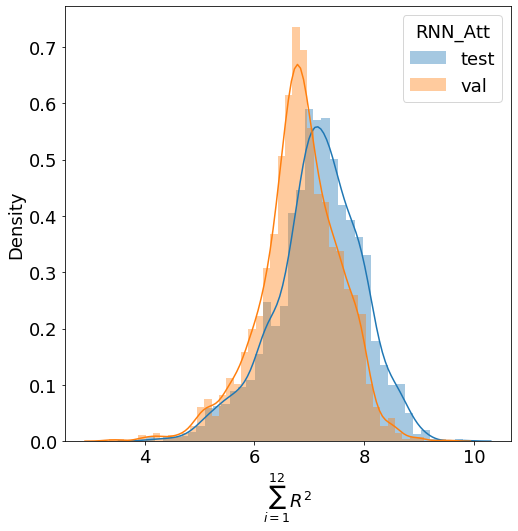

In [6]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN_Att', font=18, labels=['test','val'],save='RNN_Att_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12877
Method:                          IRLS   Log-Likelihood:                -787.19
Date:                Sun, 16 Feb 2020   Deviance:                       257.29
Time:                        21:01:32   Pearson chi2:                     257.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5561      0.075      7.447      0.000       0.410       0.702
validation     0.9660      0.011     88.760      0.0

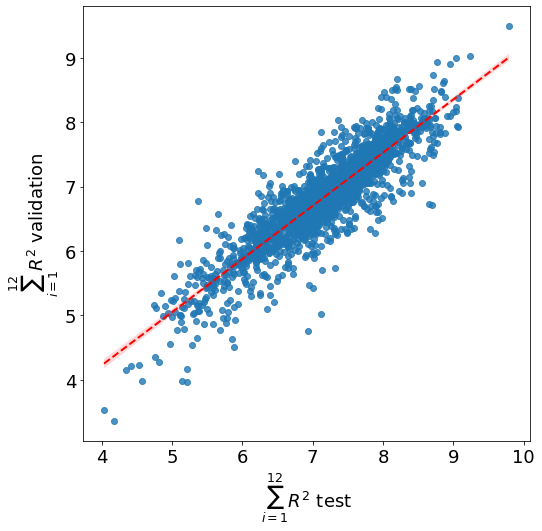

In [7]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_Att_densplot", saveformat="png")

### RNN ED s2s GRU

In [8]:
query = {"experiment": "JM_RNN_ED","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [9]:
print_config('config_RNN_ED_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': False,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': [False, False],
          'bimerge': 'ave',
          'drop': 0.0,
          'full': [512],
          'fulldrop': 0.5,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_ED_s2s',
          'neuronsD': 512,
          'neuronsE': 256,
          'nlayersD': 1,
          'nlayersE': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 1,
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'MULTIPLE',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
           

2000

[7.2160505  8.09150272 7.52425478 ... 6.84651579 6.9961654  7.60545309]
MEAN (test)= 7.1089115612254945
StDev (test)= 0.8045799065517066
MEAN (val)= 6.78669647132964
StDev (val)= 0.7491632492122784


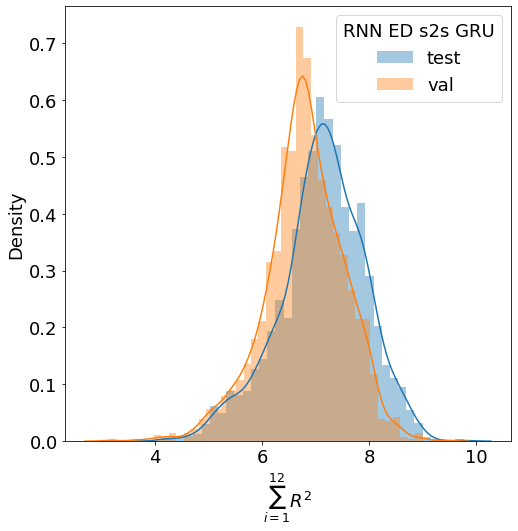

In [10]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN ED s2s GRU', font=18, labels=['test','val'],save='RNN_ED_s2s_GRU',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12977
Method:                          IRLS   Log-Likelihood:                -794.87
Date:                Sun, 16 Feb 2020   Deviance:                       259.28
Time:                        21:01:36   Pearson chi2:                     259.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5907      0.073      8.047      0.000       0.447       0.735
validation     0.9604      0.011     89.326      0.0

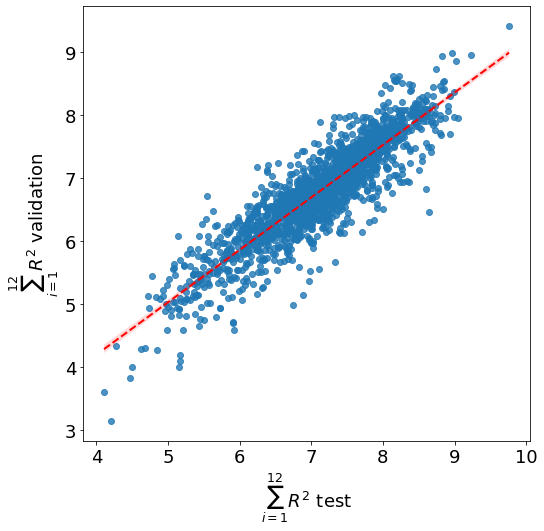

In [11]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_ED_densplot", saveformat="png")

## RNN s2s LSTM

In [12]:
query = {"experiment": "JM_RNN_s2s_LSTM","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [13]:
print_config('config_RNN_s2s_LSTM')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'LSTM'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 1

[7.88112382 8.87356716 8.77627651 ... 6.98780462 5.35921898 5.51442768]
MEAN (test)= 6.952368304051126
StDev (test)= 0.8051751475181181
MEAN (val)= 6.634738706034356
StDev (val)= 0.737981798760126


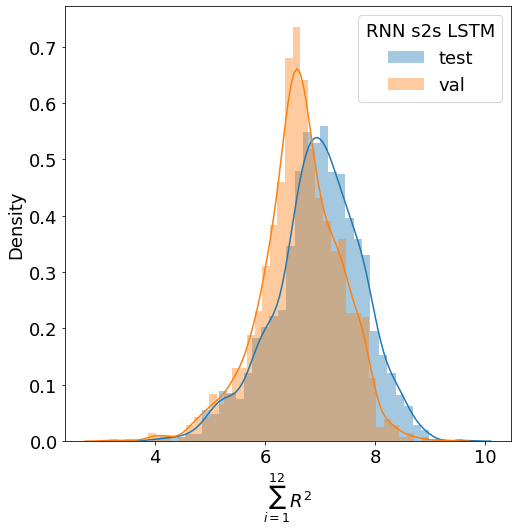

In [14]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN s2s LSTM', font=18, labels=['test','val'],save='RNN_s2s_LSTM',saveformat='png')

## RNN ED s2s LSTM

In [15]:
query = {"experiment": "JM_RNN_ED_LSTM","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [16]:
print_config('config_RNN_ED_s2s_LSTM')

{'_id': '00000000',
 'arch': {'CuDNN': False,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': [False, False],
          'bimerge': 'ave',
          'drop': 0.0,
          'full': [512],
          'fulldrop': 0.5,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_ED_s2s',
          'neuronsD': 512,
          'neuronsE': 256,
          'nlayersD': 1,
          'nlayersE': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'LSTM'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 1,
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'MULTIPLE',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
          

[7.89425767 8.82582487 8.83036294 ... 6.89014953 5.50576627 5.62434742]
MEAN (test)= 6.965326687885386
StDev (test)= 0.8072003574860644
MEAN (val)= 6.652263622619688
StDev (val)= 0.7491790257586137


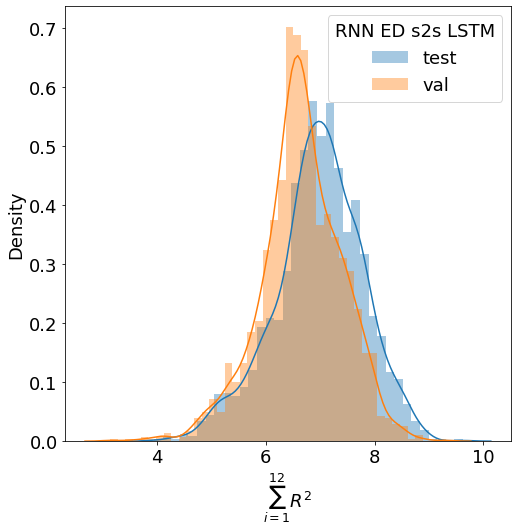

In [17]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN ED s2s LSTM', font=18, labels=['test','val'],save='RNN_ED_s2s_LSTM',saveformat='png')

## RNN s2s GRU

In [18]:
query = {"experiment": "JM_RNN_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [19]:
print_config('config_RNN_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

[7.88221138 9.02310105 8.95700775 ... 7.15748955 5.62384651 5.84323667]
MEAN (test)= 7.146648816983471
StDev (test)= 0.7973877848925358
MEAN (val)= 6.823080669923635
StDev (val)= 0.7362937589589522


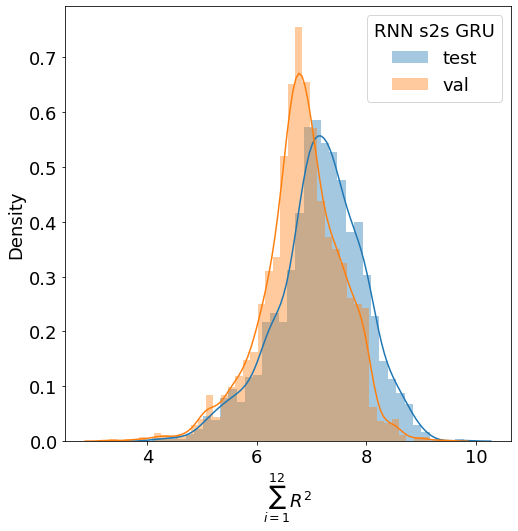

In [20]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN s2s GRU', font=18, labels=['test','val'])
# este es igual que el RNN s2s GRU no se salva

### RNN s2s GRU

In [21]:
query = {"experiment": "JM_RNN_s2s_GRU","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [22]:
print_config('config_RNN_s2s_GRU')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

[7.9568703  8.9790161  8.95865459 ... 7.19541836 5.54037182 5.82549958]
MEAN (test)= 7.147029164840893
StDev (test)= 0.7975850033091112
MEAN (val)= 6.822203859623656
StDev (val)= 0.7351967765777626


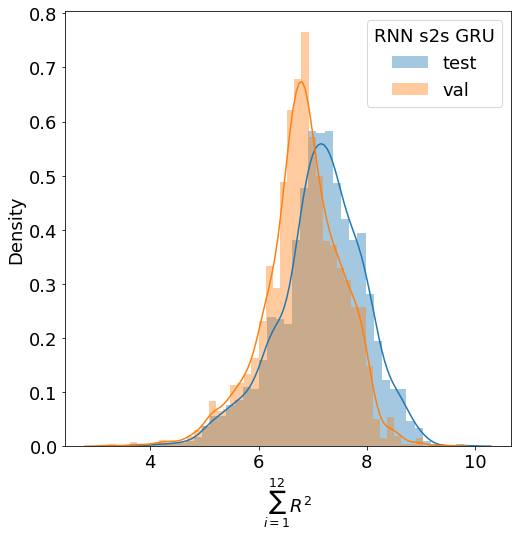

In [23]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN s2s GRU', font=18, labels=['test','val'],save='RNN_s2s_GRU',saveformat='png')

### ATT GRU

In [6]:
query = {"experiment": "JM_RNN_GRU_att","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [5]:
print_config('config_RNN_s2s_GRU')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

[7.44627091 8.79169606 8.73344823 ... 6.85616055 5.16188807 5.37169869]
MEAN (test)= 6.598458338280157
StDev (test)= 0.8259360370035093
MEAN (val)= 6.289643286994006
StDev (val)= 0.7436584063246775


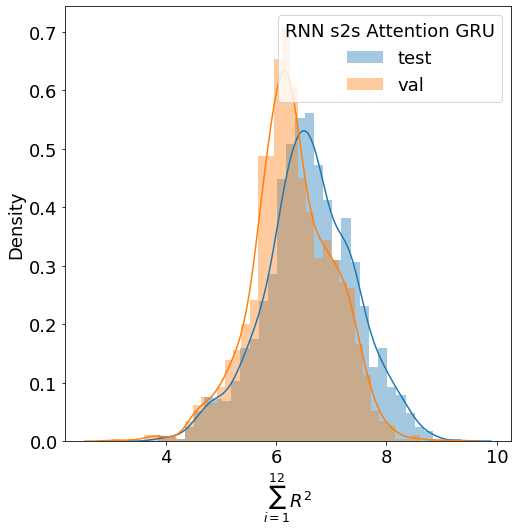

In [7]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN s2s Attention GRU', font=18, labels=['test','val'],save='RNN_s2s_att_GRU',saveformat='png')

### ATT LSTM

In [8]:
query = {"experiment": "JM_RNN_LSTM_att","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [9]:
print_config('config_RNN_s2s_LSTM')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'LSTM'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 1

[7.89867269 8.87636962 8.82221552 ... 7.06363152 5.44172871 5.6758887 ]
MEAN (test)= 7.00259647222389
StDev (test)= 0.804177994885927
MEAN (val)= 6.700811139287574
StDev (val)= 0.7435405852444249


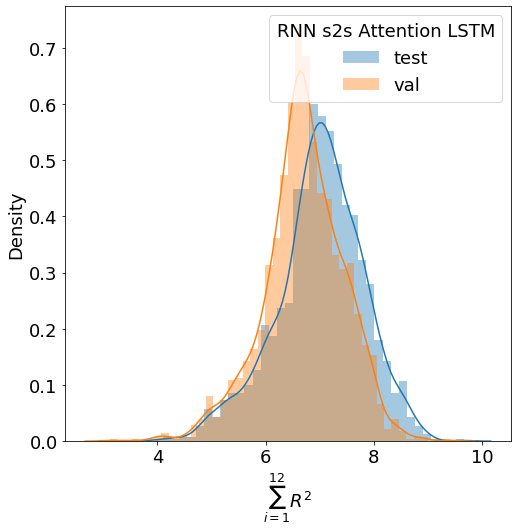

In [10]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN s2s Attention LSTM', font=18, labels=['test','val'],save='RNN_s2s_att_LSTM',saveformat='png')